<a href="https://colab.research.google.com/github/denisecammarota/data-science-course/blob/main/Clustering/ClusteringClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Practical Class
This is the script as reproduced by me, with some modifications and further inspection, on clustering techniques in R we saw in the practical classes.

## First, we load the data and do some exploratory analysis as well as eliminating NA values and replacing categorical ones. 

In [111]:
h <- read.csv('Hechos.txt')

In [112]:
head(h)

,iddueno,idpagina,secuencia,importe,dt,venta,perros,gatos,d_edad,d_sexo,ingreso,idespecie,idraza,m_edad,m_sexo,peso,tipo
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,1,19,19-11-20,0.00,2.570000000,0,1,2,60,M,116816,1,54,2.68,F,55.68,Jardin
2,1,19,19-11-20,0.00,2.570000000,0,1,2,60,M,116816,1,13,4.43,M,45.06,Jardin
3,1,2,2-19-8,196.57,13.350000000,1,1,2,60,M,116816,1,54,2.68,F,55.68,Jardin
4,1,2,2-19-8,196.57,13.350000000,1,1,2,60,M,116816,1,13,4.43,M,45.06,Jardin
5,1,10,10-18-16,0.00,0.001536316,0,1,2,60,M,116816,1,54,2.68,F,55.68,Jardin
6,1,10,10-18-16,0.00,0.001536316,0,1,2,60,M,116816,1,13,4.43,M,45.06,Jardin


Next, we are going to store the types attribute (referring to the type of publicity sold) and eliminate the attributes we know won't be useful for our problem. After that, we modify categorical attributes of sex of owner and sex of pet, replacing M = 1 and F = 0.

In [113]:
tipo <- h$tipo
h$iddueno <- NULL
h$idpagina <- NULL
h$secuencia <- NULL
h$tipo <- NULL

In [114]:
h$d_sexo <- ifelse(h$d_sexo == "M",1,0)
h$m_sexo <- ifelse(h$m_sexo == "M",1,0)

Eliminate NA in perros and gatos, replace with 0.

In [115]:
h$perros[which(is.na(h$perros))] <- 0
h$gatos[which(is.na(h$gatos))] <- 0

## Now, we focus on trying to use the K Means algorithm

We first try to classify our data into three different groups using K Means. 

In [116]:
ag.kmeans = kmeans(h,3)

Now we see the results. For example, how many variables we have in each cluster.

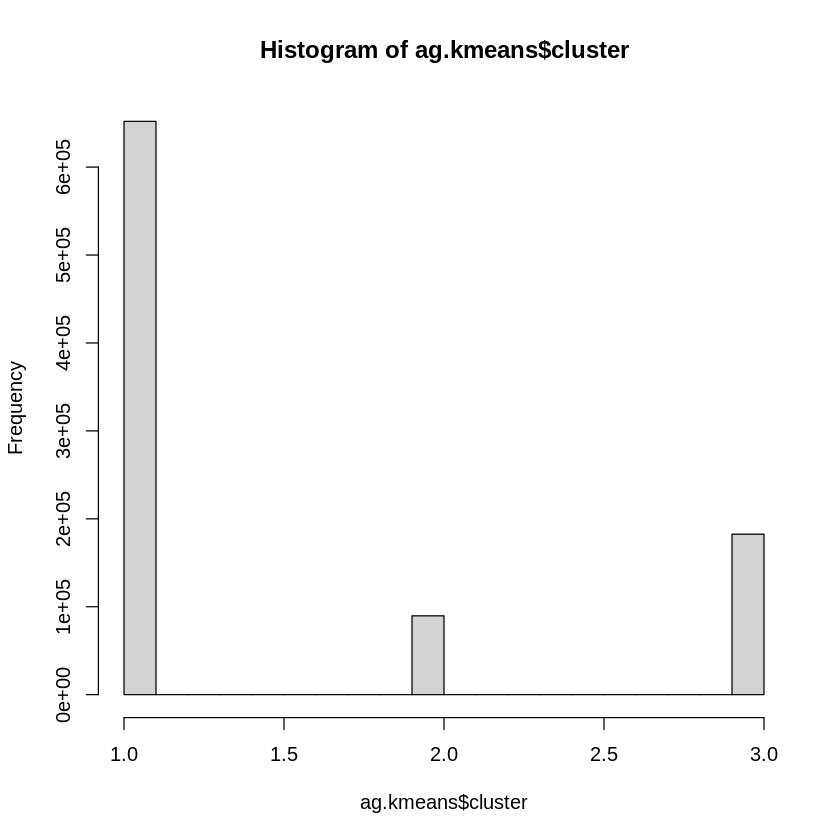

In [117]:
hist(ag.kmeans$cluster)

Now we start selecting two attributes and seeing what's going on in different pairs of axis, seeing how is the division actually made. Since it is actually 1 million data points, it will take a while to plot and to actually load correctly.

From our first graph, we see nothing, all categories are mixed up. 

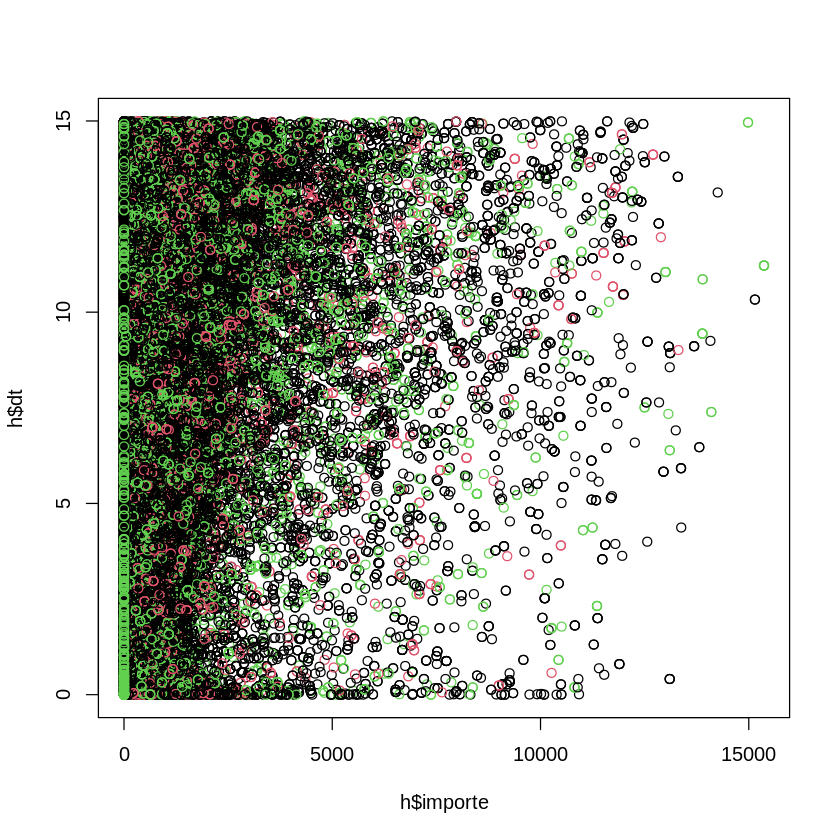

In [118]:
plot(h$importe,h$dt,col=ag.kmeans$cluster)

Now let's try and plot another one that is a bit more useful. Here, we see that the cluster doesn't care so much about edad/age as it does about ingreso/earnings.  

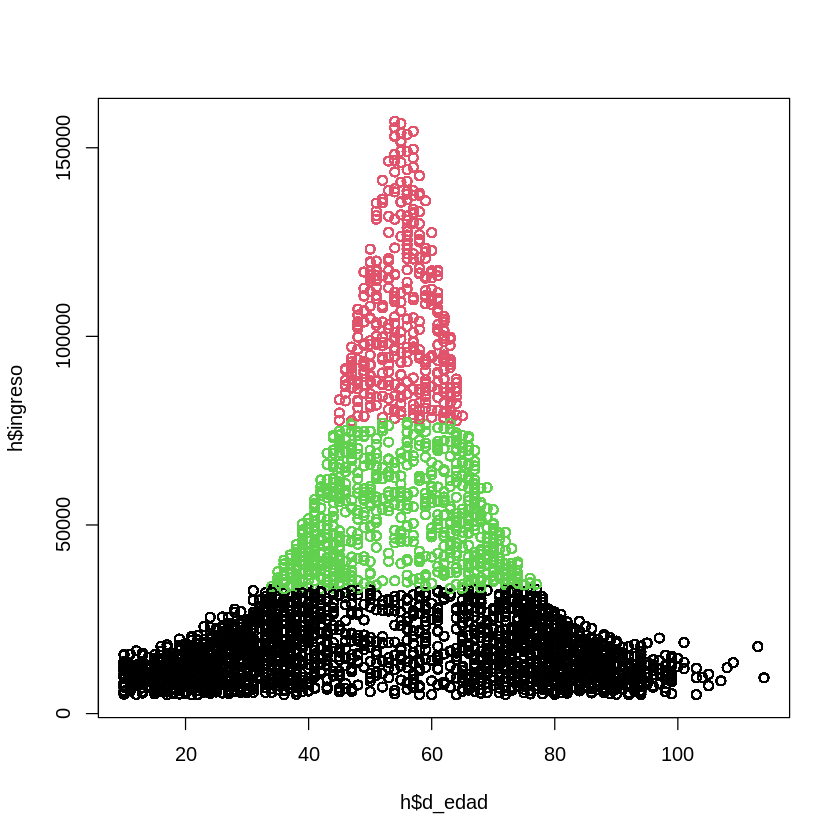

In [119]:
plot(h$d_edad,h$ingreso,col=ag.kmeans$cluster)

## Scaling the attributes 

Nevertheless, we have that thee earnings are very disperse and have very big values. They matter when we are computing distances for these types of algorithms. Therefore, what would be better is scaling all attributes correspondly. Let's do that with the function below. 

In [120]:
escalar <- function(v)
{
  (v-mean(v))/sd(v)
}

In [121]:
for(i in (1:ncol(h))){
  h[,i] <- escalar(h[,i])
} 

Next, we are going to train the k means classifier again and see what we get. We see that the variable that was apparently so important for clusters is no more. It was all a product of the different numeric values, which were distributed on a very wide range. 

In [122]:
ag.kmeans = kmeans(h,3)

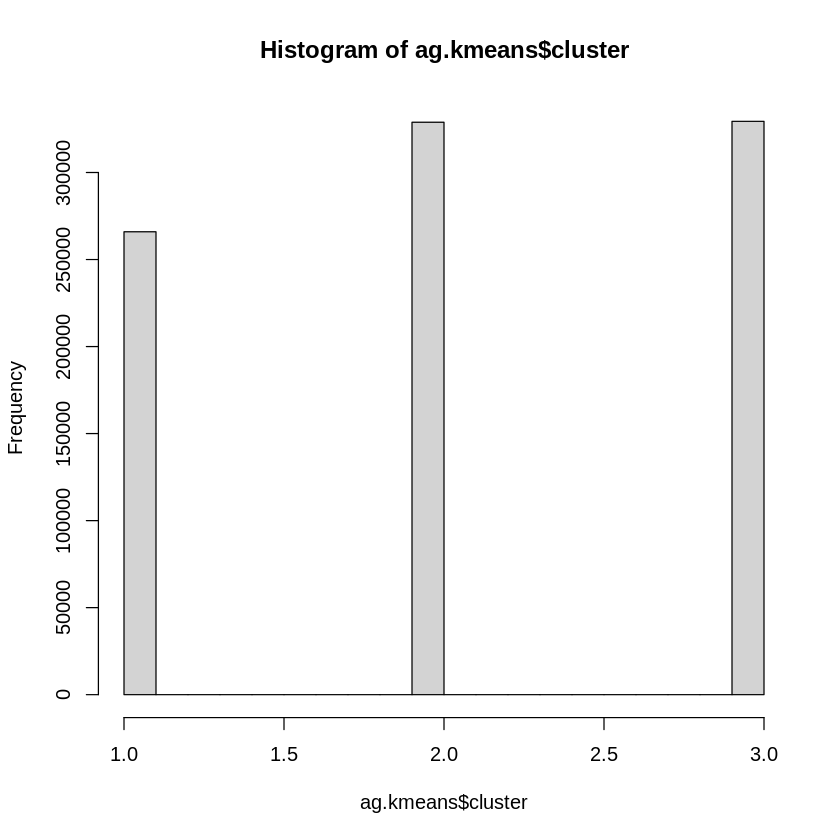

In [123]:
hist(ag.kmeans$cluster)

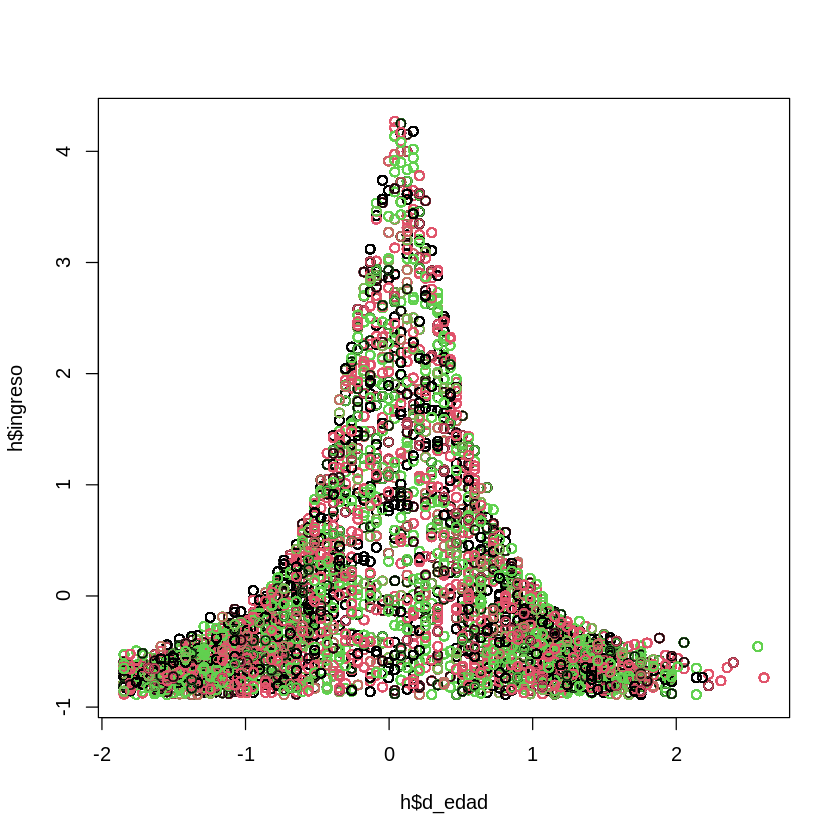

In [124]:
plot(h$d_edad,h$ingreso,col=ag.kmeans$cluster)

Now, to see if any cluster is enriched with cases from different tipos/types, we're going to use the function $table$. Here, we see no distinction, almost all clusters have similar amounts of the different types. We did the same with the sales/ventas attribute afterwards, and computed how efficent they are at selling in each category, no difference. 

In [125]:
table(tipo[which(ag.kmeans$cluster == 1)])


Jardin Pileta   Vets 
106246  79817  79877 

In [126]:
table(tipo[which(ag.kmeans$cluster == 2)])


Jardin Pileta   Vets 
131796  98868  98209 

In [127]:
table(tipo[which(ag.kmeans$cluster == 3)])


Jardin Pileta   Vets 
131641  98767  98993 

## New Clusters K Medoids 

Therefore, we are going to use another clustering technique called kmedoids. For that, we need to load the library cluster.  

In [128]:
library(cluster)

This method doesn't stand 1 million data, therefore we're going to take an arbitrary sample. 

In [129]:
h2 <- h[which(runif(nrow(h))<650/nrow(h)),]

And now we execute the code, which takes a lot more to run than k means (k means is almost instantaneous). If we start on augmenting the quantity of data, we will see that this algorithm is very slow. 

In [130]:
ag.pam <- pam(h2,3)

## Using pamk

We stay with the same dataset, because pamk is much worse when it comes to time performance. Firstly, we will import the fpc library, which contains this method. 

In [131]:
install.packages('fpc')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [132]:
library(fpc)

In [133]:
ag.pamk <- pamk(h2)

Now we see the optimal amount of groups suggested by pamk:

In [134]:
ag.pamk$nc

[1] 2

And how many points fall into each cluster really. We have 213 in the first one and 399 in the second one. 

In [135]:
table(ag.pamk$pamobject$clustering)


  1   2 
479 183 

We graph the clusters according to the same two attributes we used before of income and age. Somehow, there seems to be more red points above than below, which is a nice indication of our algorithm may be working. 

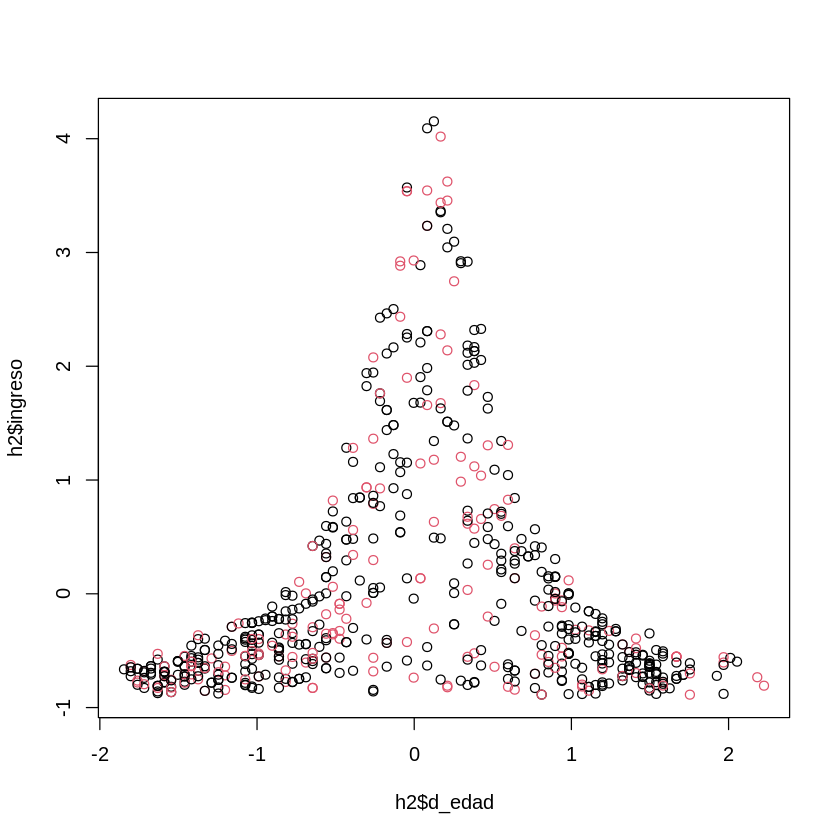

In [136]:
plot(h2$d_edad,h2$ingreso,col=ag.pamk$pamobject$cluster)

However, this is a random sample. Usually, what professionals do is use pamk to estimate the number of clusters and use other tools to actually make the clustering of the data points. 

## Other clustering algorithms 

- Hierarchical aglomerative $\rightarrow$ hclust (gives dendogram)
- Hierarchical divisive $\rightarrow$ diana (gives dendogram)
- Based on density $\rightarrow$ dbscan